# Use Random Forest to prepare a model on fraud data 
 * treating those who have taxable_income <= 30000 as "Risky" and others are "Good

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
fraud=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 15 random forest/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
# converting into 0's & 1's
fraud['Undergrad']=fraud['Undergrad'].map({'YES':1,'NO':0})
fraud['Marital.Status']=fraud['Marital.Status'].map({'Single':0,'Married':1,'Divorced':2})
fraud['Urban']=fraud['Urban'].map({'YES':1,'NO':0})

In [7]:
fraud_pred=fraud.copy

In [8]:
fraud['Taxable.Income']=fraud['Taxable.Income'].apply(lambda x:'Risky' if x>=30000 else 'Good')

In [9]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,Risky,50047,10,1
1,1,2,Risky,134075,18,1
2,0,1,Risky,160205,30,1
3,1,0,Risky,193264,15,1
4,0,1,Risky,27533,28,0


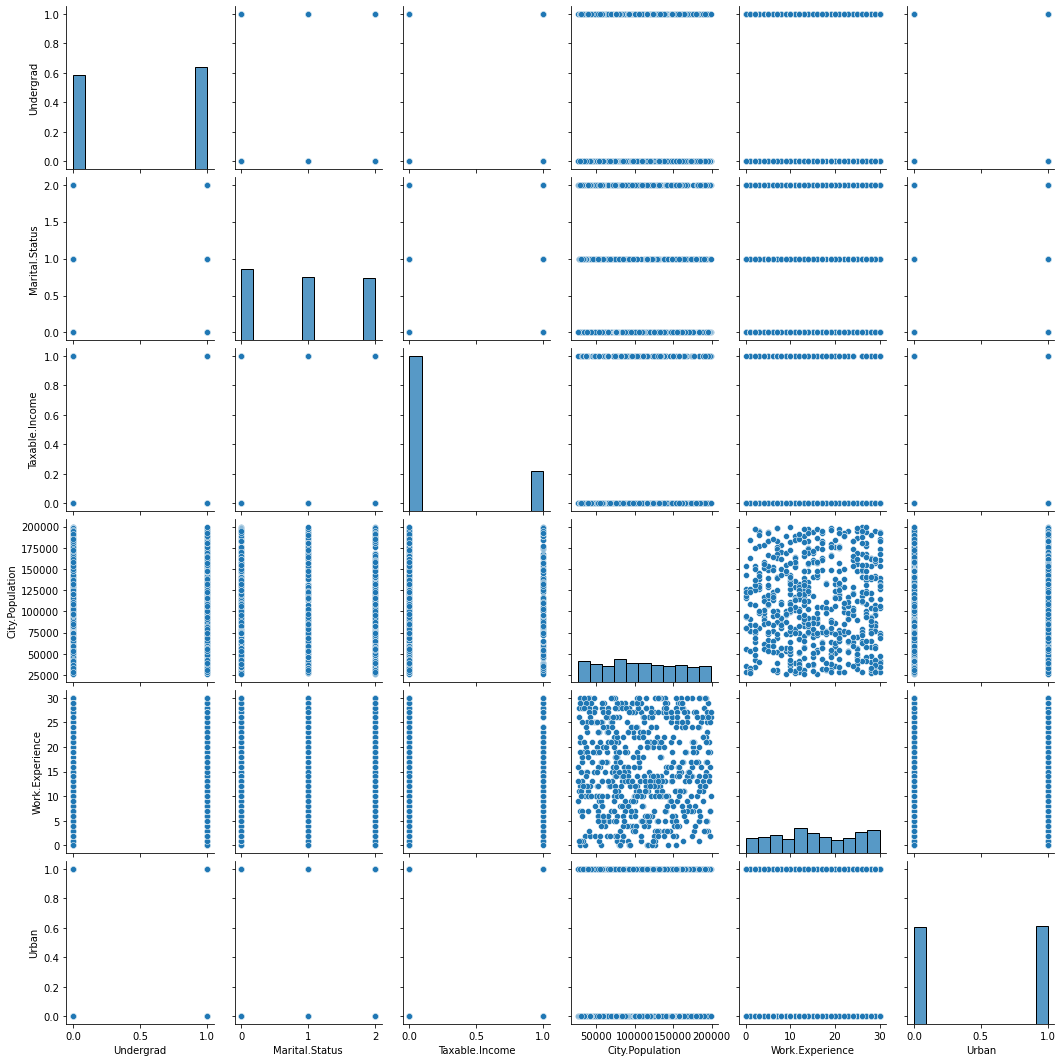

In [38]:
sns.pairplot(fraud)

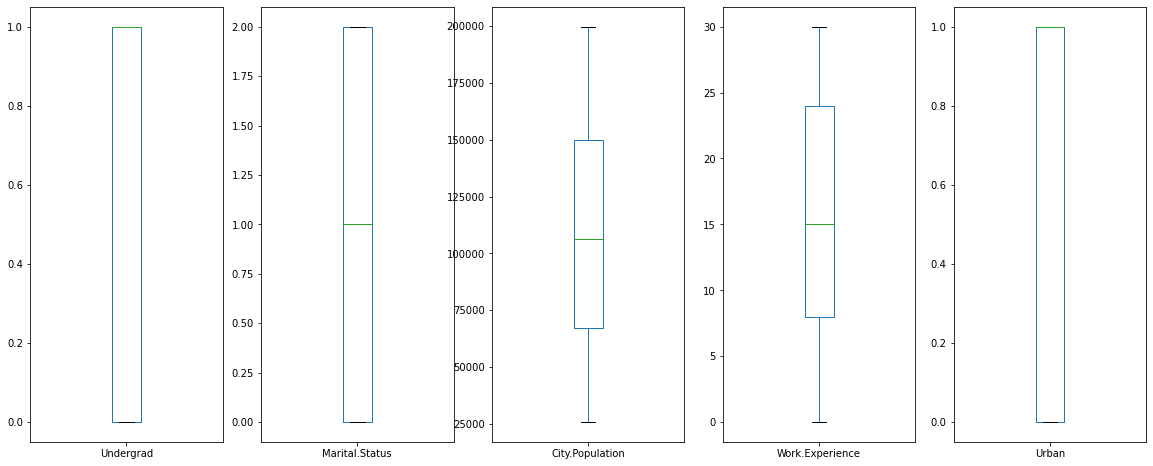

In [11]:
fraud.plot(kind='box',subplots=True,figsize=(20,8))
plt.show()

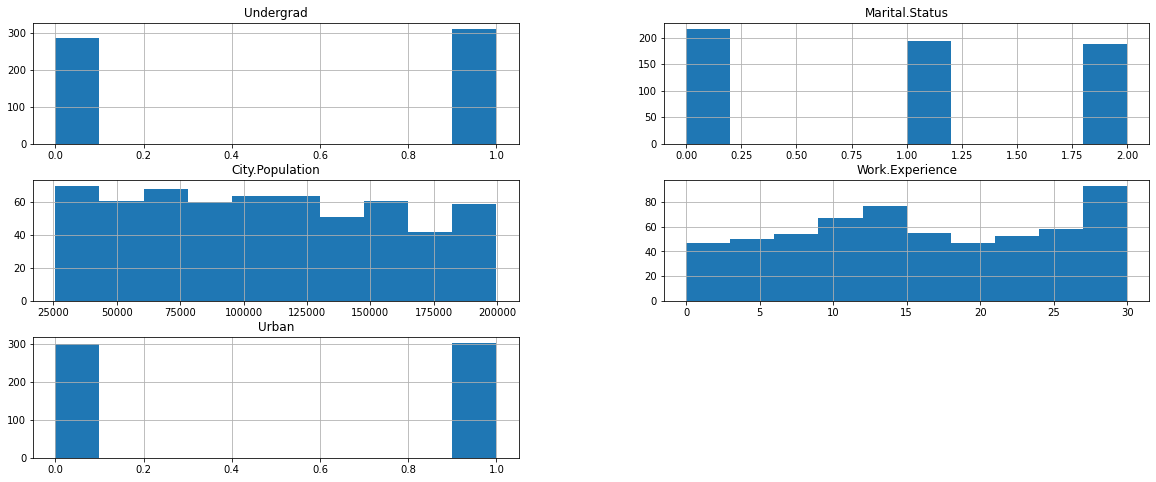

In [12]:
fraud.hist(figsize=(20,8))
plt.show()

In [13]:
## riskey = 0 , good = 1
fraud['Taxable.Income']=fraud['Taxable.Income'].apply(lambda x:0 if x=='Risky' else 1)

In [14]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,0,50047,10,1
1,1,2,0,134075,18,1
2,0,1,0,160205,30,1
3,1,0,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,2,0,39492,7,1
596,1,2,0,55369,2,1
597,0,2,0,154058,0,1
598,1,1,0,180083,17,0


In [15]:
X=fraud.drop(['Taxable.Income'],axis=1)
Y=fraud['Taxable.Income']

In [16]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0


In [17]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Taxable.Income, dtype: int64

In [18]:
Y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=2)

In [20]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
325,0,0,25779,16,1
432,0,1,157217,11,1
453,1,0,41504,26,0
177,0,1,31156,13,1
498,1,0,164924,24,1
...,...,...,...,...,...
502,0,1,53240,1,1
264,0,0,118899,5,0
297,0,1,36924,15,0
117,0,0,96370,29,1


In [21]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
435,0,2,111774,4,1
578,0,2,185339,6,0


In [22]:
y_train

325    0
432    0
453    0
177    0
498    0
      ..
502    0
264    0
297    0
117    0
72     0
Name: Taxable.Income, Length: 598, dtype: int64

In [23]:
y_test

435    0
578    0
Name: Taxable.Income, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
x_train=sc.fit_transform(x_train)
x_train

array([[-1.04446594, -1.15775725, -1.66359187,  0.04602922,  0.99333326],
       [-1.04446594,  0.06114915,  0.97609652, -0.5203385 ,  0.99333326],
       [ 0.95742711, -1.15775725, -1.34778442,  1.17876465, -1.00671148],
       ...,
       [-1.04446594,  0.06114915, -1.43976522, -0.06724433, -1.00671148],
       [-1.04446594, -1.15775725, -0.24590259,  1.51858527,  0.99333326],
       [ 0.95742711,  1.28005555, -0.00631067,  1.29203819,  0.99333326]])

In [27]:
x_test=sc.fit_transform(x_test)
x_test

array([[ 0.,  0., -1., -1.,  1.],
       [ 0.,  0.,  1.,  1., -1.]])

# Random forest classification

In [28]:
# Random Forest Classification
num_tree=100
max_features=4
kfold=KFold(n_splits=20)
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_features)
result=cross_val_score(model,X,Y,cv=kfold)
print(result.mean())

0.7433333333333335


## Bagging

In [29]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
kfold=KFold(n_splits=20)
cart=DecisionTreeClassifier()
num_trees=100
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees)
result=cross_val_score(model,X,Y,cv=kfold)
print(result.mean())

0.7266666666666668


In [30]:
result

array([0.76666667, 0.7       , 0.73333333, 0.7       , 0.7       ,
       0.53333333, 0.73333333, 0.76666667, 0.76666667, 0.73333333,
       0.73333333, 0.53333333, 0.73333333, 0.86666667, 0.6       ,
       0.8       , 0.76666667, 0.7       , 0.83333333, 0.83333333])

## Boosting

In [31]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees=100
kfold=KFold(n_splits=20)
model=AdaBoostClassifier(n_estimators=num_trees)
result=cross_val_score(model,X,Y,cv=kfold)
print(result.mean())

0.7766666666666668


In [32]:
result

array([0.8       , 0.76666667, 0.73333333, 0.73333333, 0.76666667,
       0.7       , 0.66666667, 0.8       , 0.8       , 0.76666667,
       0.8       , 0.6       , 0.86666667, 0.86666667, 0.7       ,
       0.8       , 0.76666667, 0.86666667, 0.8       , 0.93333333])

## stacking

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble  import VotingClassifier

In [34]:
# create the sub models
estimators=[]
model1=LogisticRegression(max_iter=500)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))


In [35]:
# create the ensemble model
ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,X,Y,cv=kfold)
print(result.mean())

0.7766666666666668


In [36]:
result

array([0.8       , 0.76666667, 0.73333333, 0.73333333, 0.76666667,
       0.7       , 0.66666667, 0.8       , 0.8       , 0.76666667,
       0.8       , 0.6       , 0.86666667, 0.86666667, 0.7       ,
       0.8       , 0.76666667, 0.86666667, 0.8       , 0.93333333])

* Boosting and Stacking gives the highest accuracy.